## Mini Project III

In [1]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
##from scipy.cluster.hierarchy import linkage
##from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
seed = 0


In [2]:
#Import Data
df_customer = pd.read_csv("data/twm_customer.csv", ";")
df_accounts = pd.read_csv("data/twm_accounts.csv", ";")
df_checking_accounts = pd.read_csv("data/twm_checking_acct.csv", ";")
df_credit_accounts = pd.read_csv("data/twm_credit_acct.csv", ";")
df_savings_accounts = pd.read_csv("data/twm_savings_acct.csv", ";")
df_transactions = pd.read_csv("data/twm_transactions.csv", ";")
df_saving_transactions = pd.read_csv("data/twm_savings_tran.csv", ";")
df_checking_transactions = pd.read_csv("data/twm_checking_tran.csv", ";")
df_credit_transactions = pd.read_csv("data/twm_credit_tran.csv", ";")

In [3]:
#Check data info for customers
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [4]:
#Drop columns not needed for customers
df_customer = df_customer.drop(columns=['name_prefix','first_name','last_name','street_nbr','street_name'], axis = 1)

In [5]:
df_customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,35241,Birmingham,AL


In [6]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [7]:
#Drop columns not needed for accounts
df_accounts = df_accounts.drop(columns=['account_active','acct_start_date','acct_end_date'], axis = 1)
df_accounts

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance
0,13628063,1362806,SV,1430.22,284.58
1,4561143213627090,1362709,CC,266.34,496.15
2,4561143213628360,1362836,CC,55.90,1000.00
3,13633112,1363311,CK,11017.13,968.46
4,4561143213633610,1363361,CC,849.37,462.28
...,...,...,...,...,...
1404,4561143213625560,1362556,CC,1433.94,20.00
1405,4561143213626240,1362624,CC,632.75,1400.00
1406,4561143213628750,1362875,CC,2810.91,3000.00
1407,13626543,1362654,SV,784.53,622.46


In [8]:
#Review checking accounts
df_checking_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           520 non-null    int64  
 1   acct_nbr          520 non-null    int64  
 2   minimum_balance   520 non-null    int64  
 3   per_check_fee     520 non-null    float64
 4   account_active    520 non-null    object 
 5   acct_start_date   520 non-null    object 
 6   acct_end_date     52 non-null     object 
 7   starting_balance  520 non-null    float64
 8   ending_balance    520 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 36.7+ KB


In [9]:
#Drop columns not needed for checking accounts
df_checking_accounts = df_checking_accounts.drop(columns=['account_active','acct_start_date','acct_end_date','per_check_fee'], axis = 1)
df_checking_accounts

,cust_id,acct_nbr,minimum_balance,starting_balance,ending_balance
0,1362548,13625482,3000,6004.34,569.65
1,1362487,13624872,3000,2781.07,1401.21
2,1363017,13630172,3000,2694.91,147.15
3,1362752,13627522,100,487.69,3.76
4,1363282,13632822,100,133.90,84.18
...,...,...,...,...,...
515,1363467,13634672,3000,4155.98,58.47
516,1362855,13628552,200,202.30,1070.87
517,1363324,13633242,3000,4010.41,2325.37
518,1362569,13625692,200,927.07,46.48


In [10]:
#Review info credit accounts
df_credit_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [11]:
#Drop columns not needed for credit accounts
df_credit_accounts = df_credit_accounts.drop(columns=['account_active','acct_start_date','acct_end_date'], axis = 1)
df_credit_accounts

,cust_id,acct_nbr,credit_limit,credit_rating,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,657.46,286.69
1,1362487,4561143213624870,3000,0,0.00,1548.23
2,1362548,4561143213625480,6700,0,6965.25,68.68
3,1362752,4561143213627520,2400,0,2302.14,0.00
4,1363017,4561143213630170,1000,0,0.00,1000.00
...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,1783.86,1785.97
464,1363467,4561143213634670,1500,0,1193.89,1500.00
465,1363263,4561143213632630,3000,0,0.00,1218.94
466,1362569,4561143213625690,9200,0,0.00,9200.00


In [12]:
#Review info checking accounts
df_savings_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


In [13]:
#Drop columns not needed for savings accounts
df_savings_accounts = df_savings_accounts.drop(columns=['account_active','acct_start_date','acct_end_date'], axis = 1)
df_savings_accounts

,cust_id,acct_nbr,minimum_balance,acct_type,starting_balance,ending_balance
0,1363160,13631603,100,BS,113.04,122.54
1,1362487,13624873,500,MM,651.73,12.89
2,1362548,13625483,100,BS,250.24,254.02
3,1362752,13627523,100,BS,600.26,609.33
4,1363017,13630173,100,BS,2011.02,2901.35
...,...,...,...,...,...,...
416,1363141,13631413,100,BS,177.33,528.57
417,1363038,13630383,100,BS,333.53,508.26
418,1362529,13625293,100,BS,662.06,873.14
419,1362895,13628953,100,BS,169.96,96.25


In [14]:
#review info Transactions
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


In [15]:
# Review info Saving Transactions
df_saving_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11189 entries, 0 to 11188
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        11189 non-null  int64  
 1   tran_id        11189 non-null  int64  
 2   tran_amt       11189 non-null  float64
 3   principal_amt  11189 non-null  float64
 4   interest_amt   11189 non-null  float64
 5   new_balance    11189 non-null  float64
 6   tran_date      11189 non-null  object 
 7   tran_time      11189 non-null  object 
 8   channel        11189 non-null  object 
 9   tran_code      11189 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 874.3+ KB


In [16]:
# Review info Checking Transactions
df_checking_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        46204 non-null  int64  
 1   tran_id        46204 non-null  int64  
 2   tran_amt       46204 non-null  float64
 3   principal_amt  46204 non-null  float64
 4   interest_amt   46204 non-null  float64
 5   new_balance    46204 non-null  float64
 6   tran_date      46204 non-null  object 
 7   tran_time      46204 non-null  object 
 8   channel        46204 non-null  object 
 9   tran_code      46204 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.5+ MB


In [17]:
# Review info Credit Transactions
df_credit_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [18]:
df_transactions.describe()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_time
count,77580.000000,7.758000e+04,77580.000000,77580.000000,77580.000000,77580.000000,77580.000000
mean,38.228332,1.185674e+15,-7.748275,-8.509662,0.762784,571.571177,104277.077984
std,27.838521,2.000564e+15,312.684674,311.006502,4.427059,2158.948572,87527.030938
min,1.000000,1.362480e+07,-3312.410000,-3312.410000,0.000000,-17300.000000,0.000000
25%,15.000000,1.362824e+07,-100.000000,-100.000000,0.000000,0.000000,0.000000
50%,32.000000,1.363199e+07,-1.815000,-1.815000,0.000000,180.400000,110626.000000
75%,59.000000,4.561143e+15,0.170000,0.000000,0.000000,957.252500,184245.250000
max,155.000000,4.561143e+15,17464.520000,17300.000000,164.520000,29868.390000,235959.000000


In [19]:
#clean and set values for transactions

transactions_all = [df_transactions,df_saving_transactions,df_credit_transactions,df_checking_transactions] #Process data common cleansing
for i in range(len(transactions_all)):
    transactions_all[i]['tran_time'] = transactions_all[i]['tran_time'].astype(str)
    transactions_all[i]['tran_time'] = transactions_all[i]['tran_time'].replace('',np.nan)
    transactions_all[i].loc[(transactions_all[i]['tran_time'].str.len() > 6) | (transactions_all[i]['tran_time'].str.len() <=4),'tran_time'] = np.nan
    transactions_all[i]['tran_time'] = pd.to_datetime(transactions_all[i]['tran_time'], format='%H%M%S').dt.hour
    transactions_all[i]['tran_date'] = pd.to_datetime(transactions_all[i]['tran_date'], format='%d.%m.%Y').dt.normalize()

df_transactions,df_saving_transactions,df_credit_transactions,df_checking_transactions = transactions_all #return values cleaned



In [20]:
#drop columns not needed for transactions
df_transactions = df_transactions.drop(['channel'],axis=1)
df_saving_transactions   = df_saving_transactions.drop(['channel'],axis=1)
df_credit_transactions   = df_credit_transactions.drop(['channel'],axis=1)
df_checking_transactions = df_checking_transactions.drop(['channel'],axis=1)
df_transactions_all = pd.concat([df_saving_transactions,df_credit_transactions,df_checking_transactions])
df_transactions_all

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,1995-10-26,8.0,DP
1,1362746,1,2.83,0.00,2.83,2265.90,1995-01-31,23.0,IN
2,1363251,11,13.56,0.00,13.56,5438.90,1995-04-30,23.0,IN
3,1362542,4,0.76,0.00,0.76,610.92,1995-04-30,23.0,IN
4,1363387,11,148.69,148.69,0.00,470.05,1995-05-21,14.0,DP
...,...,...,...,...,...,...,...,...,...
46199,1363272,50,-0.15,-0.15,0.00,319.71,1995-10-03,NaN,FK
46200,1363393,61,-102.52,-102.52,0.00,57.47,1995-01-22,NaN,WD
46201,1363365,25,-275.89,-275.89,0.00,2632.93,1995-01-08,NaN,WD
46202,1363031,73,-0.15,-0.15,0.00,1103.47,1995-01-23,NaN,FK


Text(0.5, 1.0, 'Number of transactions for credit accounts')

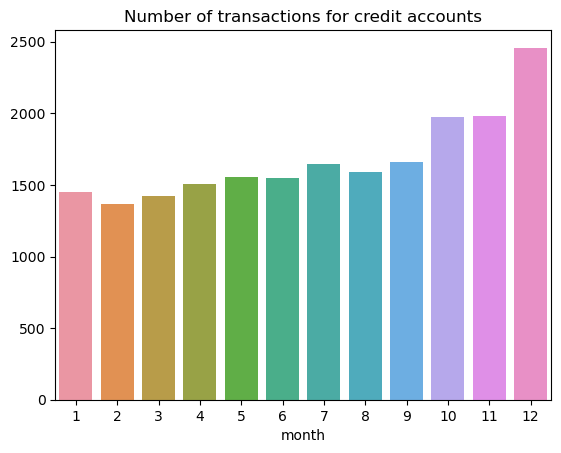

In [21]:
df_credit_transactions['month'] = df_credit_transactions['tran_date'].dt.month
sns.barplot(x=df_credit_transactions.groupby('month').size().index, y=df_credit_transactions.groupby('month').size())
plt.title('Number of transactions for credit accounts')

Text(0.5, 1.0, 'Number of transactions for saving accounts')

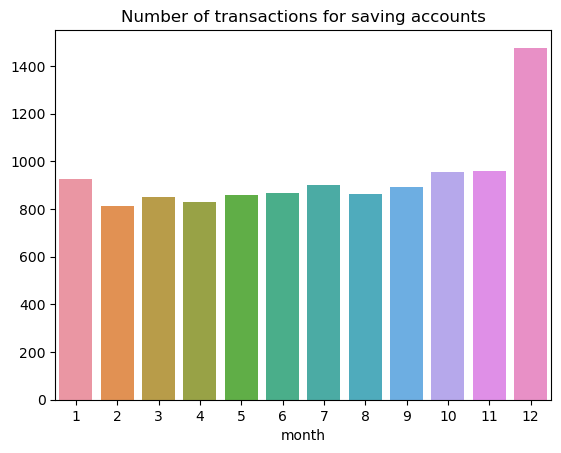

In [22]:
df_saving_transactions['month'] = df_saving_transactions['tran_date'].dt.month
sns.barplot(x=df_saving_transactions.groupby('month').size().index, y=df_saving_transactions.groupby('month').size())
plt.title('Number of transactions for saving accounts')

Text(0.5, 1.0, 'Number of transactions for checking accounts')

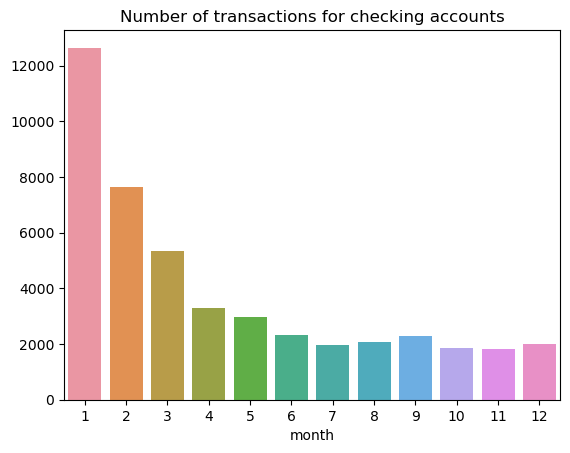

In [23]:
df_checking_transactions['month'] = df_checking_transactions['tran_date'].dt.month
sns.barplot(x=df_checking_transactions.groupby('month').size().index, y=df_checking_transactions.groupby('month').size())
plt.title('Number of transactions for checking accounts')


In [24]:
#Get transactions in saving and get total
df_svg_tot = pd.DataFrame(df_saving_transactions.groupby(['cust_id']).sum()['principal_amt'])
df_svg_tot.columns = ['sav_avg']
#Transactions made
#svg_count = pd.DataFrame(df_saving_transactions.groupby(['cust_id']).count()['tran_id'])
#svg_count.columns = ['svg_count']

df_saving_transactions = pd.merge(df_svg_tot, df_saving_transactions, on='cust_id', how='right')

In [25]:
df_saving_transactions

,cust_id,sav_avg,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month
0,1363481,1436.21,26,136.03,136.03,0.00,1521.57,1995-10-26,8.0,DP,10
1,1362746,648.86,1,2.83,0.00,2.83,2265.90,1995-01-31,23.0,IN,1
2,1363251,-96.45,11,13.56,0.00,13.56,5438.90,1995-04-30,23.0,IN,4
3,1362542,1035.42,4,0.76,0.00,0.76,610.92,1995-04-30,23.0,IN,4
4,1363387,-56.94,11,148.69,148.69,0.00,470.05,1995-05-21,14.0,DP,5
...,...,...,...,...,...,...,...,...,...,...,...
11184,1362950,864.78,10,1.68,0.00,1.68,674.90,1995-10-31,23.0,IN,10
11185,1362721,-120.87,14,0.02,0.00,0.02,13.82,1995-09-30,23.0,IN,9
11186,1362806,-1186.18,4,3.60,0.00,3.60,1444.57,1995-04-30,23.0,IN,4
11187,1362995,2476.13,36,541.91,541.91,0.00,4326.98,1995-09-24,15.0,DP,9


#### Customers info processing and segmentation

In [26]:
df_customer.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,98186.000000


In [27]:
# Create age segments
#df_cust_age_income = df_customer[['age', 'income']]
X = df_customer.loc[:, ['income', 'age']]
df_income_age = df_customer.loc[:, ['cust_id','income', 'age']]
X

,income,age
0,26150,46
1,6605,71
2,18548,38
3,47668,54
4,44554,59
...,...,...
742,14795,36
743,26387,56
744,61300,50
745,15100,37


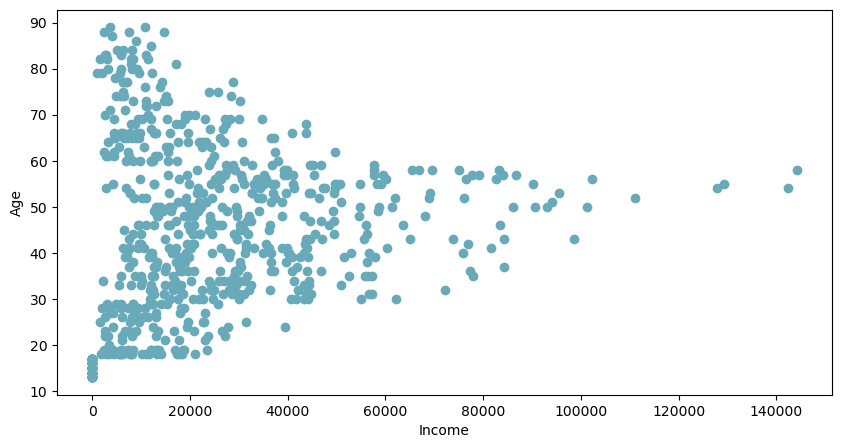

In [28]:
#Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(x= X['income'], y=X['age'],color='#68aaba')
plt.xlabel('Income')
plt.ylabel('Age');

In [29]:
wcss = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(X)
    wcss.append(km.inertia_)

In [30]:
wcss

[133711301166.03737,
 66699107170.71619,
 37886249645.3024,
 27306996731.115356,
 17722482935.32248,
 12278331795.23426,
 8789430069.263807,
 6875073849.540686,
 5541894076.490701,
 4354115923.476124,
 3657324795.0820265,
 3045229712.6946697,
 2679413877.438349]

In [31]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

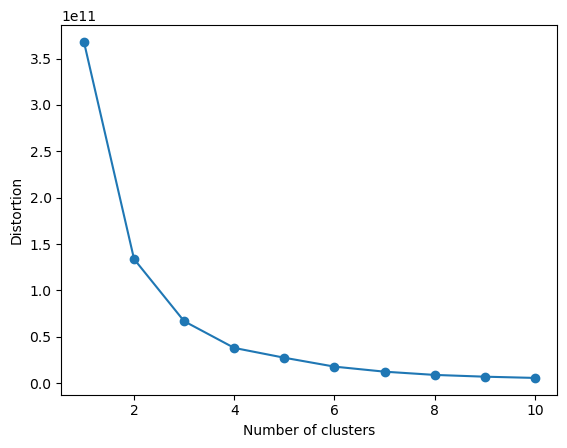

In [32]:
# elbow rule
plot_distortion(X,max_clusters=10)

In [33]:
#Create first cluster with Kmeans 5 based on the elbow
km = KMeans(n_clusters = 5)
km.fit(X)

KMeans(n_clusters=5)

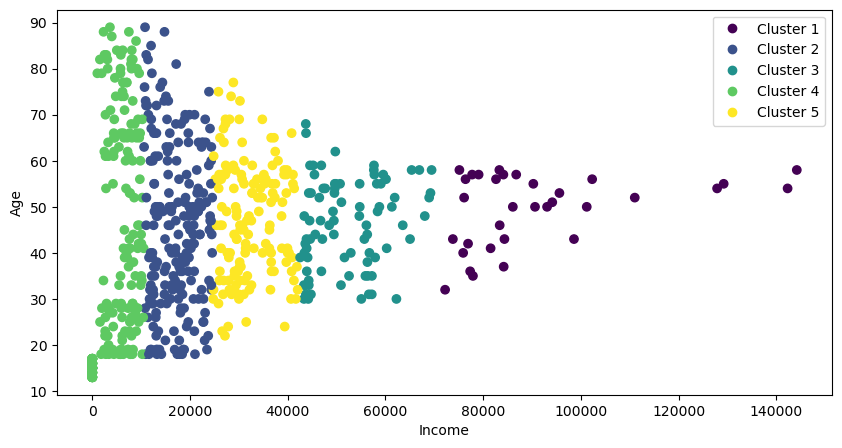

In [34]:
#Create cluster based on demographic  information.
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)
plt.xlabel('Income')
plt.ylabel('Age');
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5']);

In [35]:
def draw_clusters(X, km, centers = False):
    X_centr = []
    Y_centr = []
    ##centers = False    
    for cluster in set(km): 
               x = X[km == cluster, 0]
               y = X[km == cluster, 1]
               X_centr.append(np.mean(x))
               Y_centr.append(np.mean(y))

               plt.scatter(x, 
                           y,
                           s = 50,
                           marker = 'o',
                           label = f'cluster {cluster}')

    if centers:
        plt.scatter(X_centr, 
                    Y_centr, 
                    marker = "*", 
                    c = 'black', 
                    s = 250, 
                    label = 'Centroid')
    plt.legend()
    plt.grid()
    plt.show()

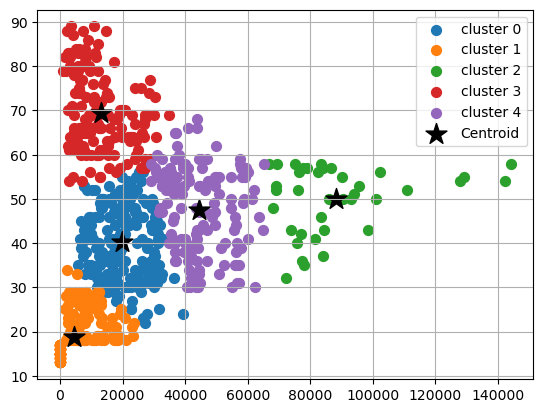

In [36]:
X = df_customer.iloc[:, 1:3].values
scal = StandardScaler()
X_scal = scal.fit_transform(X)
km_scal = km.fit_predict(X_scal)
draw_clusters(X, km_scal, centers= True)

In [37]:
# Create cluster based on baking behaviour

In [38]:
df_accounts

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance
0,13628063,1362806,SV,1430.22,284.58
1,4561143213627090,1362709,CC,266.34,496.15
2,4561143213628360,1362836,CC,55.90,1000.00
3,13633112,1363311,CK,11017.13,968.46
4,4561143213633610,1363361,CC,849.37,462.28
...,...,...,...,...,...
1404,4561143213625560,1362556,CC,1433.94,20.00
1405,4561143213626240,1362624,CC,632.75,1400.00
1406,4561143213628750,1362875,CC,2810.91,3000.00
1407,13626543,1362654,SV,784.53,622.46


In [39]:
df_accounts_gp = df_accounts.groupby(['cust_id','acct_type']).count()

In [40]:
df_accounts_gp = df_accounts_gp.groupby(['cust_id', 'acct_type'])['ending_balance'].count()
df_accounts_gp = df_accounts_gp.unstack(level=1)
df_accounts_gp = df_accounts_gp.fillna(0).reset_index()

In [41]:
df_accounts_gp

acct_type,cust_id,CC,CK,SV
0,1362480,1.0,1.0,1.0
1,1362484,1.0,1.0,1.0
2,1362485,1.0,1.0,0.0
3,1362486,0.0,1.0,1.0
4,1362487,1.0,1.0,1.0
...,...,...,...,...
660,1363490,0.0,0.0,1.0
661,1363491,0.0,0.0,1.0
662,1363492,1.0,1.0,1.0
663,1363493,1.0,1.0,1.0


In [42]:
#Organize accounts for merge
df_savings_accounts

,cust_id,acct_nbr,minimum_balance,acct_type,starting_balance,ending_balance
0,1363160,13631603,100,BS,113.04,122.54
1,1362487,13624873,500,MM,651.73,12.89
2,1362548,13625483,100,BS,250.24,254.02
3,1362752,13627523,100,BS,600.26,609.33
4,1363017,13630173,100,BS,2011.02,2901.35
...,...,...,...,...,...,...
416,1363141,13631413,100,BS,177.33,528.57
417,1363038,13630383,100,BS,333.53,508.26
418,1362529,13625293,100,BS,662.06,873.14
419,1362895,13628953,100,BS,169.96,96.25


In [43]:
#df_savings_accounts = df_savings_accounts.drop(columns=['minimum_balance','acct_type','account_active', 'acct_start_date','acct_end_date','starting_balance'])

In [44]:
df_accounts_gp = pd.merge(df_accounts_gp, df_savings_accounts, on='cust_id', how='left')

In [45]:
df_accounts_gp = df_accounts_gp.rename(columns= {"acct_nbr" : "saving_acct" , "ending_balance" : "saving_bal"} )
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance,acct_type,starting_balance,saving_bal
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89
...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61


In [46]:
##Reworking data for checking accounts
df_checking_accounts

,cust_id,acct_nbr,minimum_balance,starting_balance,ending_balance
0,1362548,13625482,3000,6004.34,569.65
1,1362487,13624872,3000,2781.07,1401.21
2,1363017,13630172,3000,2694.91,147.15
3,1362752,13627522,100,487.69,3.76
4,1363282,13632822,100,133.90,84.18
...,...,...,...,...,...
515,1363467,13634672,3000,4155.98,58.47
516,1362855,13628552,200,202.30,1070.87
517,1363324,13633242,3000,4010.41,2325.37
518,1362569,13625692,200,927.07,46.48


In [47]:
#df_checking_accounts = df_checking_accounts.drop(columns=['minimum_balance','per_check_fee','account_active', 'acct_start_date','acct_end_date','starting_balance'])

In [48]:
df_accounts_gp = pd.merge(df_accounts_gp, df_checking_accounts, on='cust_id', how='left')

In [49]:
df_accounts_gp = df_accounts_gp.rename(columns= {"acct_nbr" : "checking_acct" , "ending_balance" : "checking_bal"} )
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,minimum_balance_y,starting_balance_y,checking_bal
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,100.0,331.85,86.86
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,3000.0,2613.46,95.32
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,13624852.0,100.0,209.78,45.49
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,3000.0,4252.39,3312.27
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,3000.0,2781.07,1401.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,NaN,NaN,NaN,NaN
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,NaN,NaN,NaN,NaN
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,100.0,1350.61,106.14
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,3000.0,6123.84,2053.90


In [50]:
##Reworking data for Credit accounts
df_credit_accounts

,cust_id,acct_nbr,credit_limit,credit_rating,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,657.46,286.69
1,1362487,4561143213624870,3000,0,0.00,1548.23
2,1362548,4561143213625480,6700,0,6965.25,68.68
3,1362752,4561143213627520,2400,0,2302.14,0.00
4,1363017,4561143213630170,1000,0,0.00,1000.00
...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,1783.86,1785.97
464,1363467,4561143213634670,1500,0,1193.89,1500.00
465,1363263,4561143213632630,3000,0,0.00,1218.94
466,1362569,4561143213625690,9200,0,0.00,9200.00


In [51]:
#df_credit_accounts = df_credit_accounts.drop(columns=['credit_limit','credit_rating','account_active', 'acct_start_date','acct_end_date','starting_balance'])

In [52]:
df_accounts_gp = pd.merge(df_accounts_gp, df_credit_accounts, on='cust_id', how='left')

In [53]:
df_accounts_gp = df_accounts_gp.rename(columns= {"acct_nbr" : "credit_acct" , "ending_balance" : "credit_bal"} )
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,minimum_balance_y,starting_balance_y,checking_bal,credit_acct,credit_limit,credit_rating,starting_balance,credit_bal
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,100.0,331.85,86.86,4.561143e+15,2500.0,0.0,1607.40,20.00
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,3000.0,2613.46,95.32,4.561143e+15,3000.0,0.0,1278.78,369.72
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,13624852.0,100.0,209.78,45.49,4.561143e+15,1100.0,0.0,282.38,1100.00
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,3000.0,4252.39,3312.27,NaN,NaN,NaN,NaN,NaN
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,3000.0,2781.07,1401.21,4.561143e+15,3000.0,0.0,0.00,1548.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,100.0,1350.61,106.14,4.561143e+15,7100.0,0.0,4128.58,6869.00
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,3000.0,6123.84,2053.90,4.561143e+15,1500.0,0.0,0.00,0.00


In [54]:
#Transactions
df_saving_transactions


,cust_id,sav_avg,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month
0,1363481,1436.21,26,136.03,136.03,0.00,1521.57,1995-10-26,8.0,DP,10
1,1362746,648.86,1,2.83,0.00,2.83,2265.90,1995-01-31,23.0,IN,1
2,1363251,-96.45,11,13.56,0.00,13.56,5438.90,1995-04-30,23.0,IN,4
3,1362542,1035.42,4,0.76,0.00,0.76,610.92,1995-04-30,23.0,IN,4
4,1363387,-56.94,11,148.69,148.69,0.00,470.05,1995-05-21,14.0,DP,5
...,...,...,...,...,...,...,...,...,...,...,...
11184,1362950,864.78,10,1.68,0.00,1.68,674.90,1995-10-31,23.0,IN,10
11185,1362721,-120.87,14,0.02,0.00,0.02,13.82,1995-09-30,23.0,IN,9
11186,1362806,-1186.18,4,3.60,0.00,3.60,1444.57,1995-04-30,23.0,IN,4
11187,1362995,2476.13,36,541.91,541.91,0.00,4326.98,1995-09-24,15.0,DP,9


In [55]:
##leave only columns that I will use
df_saving_tr_red = df_saving_transactions.drop(columns=['tran_amt','interest_amt','new_balance', 'tran_date','tran_time','tran_code'])

In [56]:
df_saving_tr_red = df_saving_tr_red[['cust_id', 'tran_id']].groupby(['cust_id']).count()
 ##df_accounts.groupby(['cust_id','acct_type']).count()
df_saving_tr_red

,tran_id
cust_id,
1362480,26
1362484,33
1362486,25
1362487,19
1362489,22
...,...
1363490,12
1363491,18
1363492,25


In [57]:
df_accounts_gp = pd.merge(df_accounts_gp, df_saving_tr_red, on='cust_id', how='left')
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,minimum_balance_y,starting_balance_y,checking_bal,credit_acct,credit_limit,credit_rating,starting_balance,credit_bal,tran_id
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,100.0,331.85,86.86,4.561143e+15,2500.0,0.0,1607.40,20.00,26.0
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,3000.0,2613.46,95.32,4.561143e+15,3000.0,0.0,1278.78,369.72,33.0
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,13624852.0,100.0,209.78,45.49,4.561143e+15,1100.0,0.0,282.38,1100.00,NaN
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,3000.0,4252.39,3312.27,NaN,NaN,NaN,NaN,NaN,25.0
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,3000.0,2781.07,1401.21,4.561143e+15,3000.0,0.0,0.00,1548.23,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,100.0,1350.61,106.14,4.561143e+15,7100.0,0.0,4128.58,6869.00,25.0
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,3000.0,6123.84,2053.90,4.561143e+15,1500.0,0.0,0.00,0.00,19.0


In [58]:
df_accounts_gp = df_accounts_gp.rename(columns= {"tran_id" : "saving_tran"} )
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,minimum_balance_y,starting_balance_y,checking_bal,credit_acct,credit_limit,credit_rating,starting_balance,credit_bal,saving_tran
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,100.0,331.85,86.86,4.561143e+15,2500.0,0.0,1607.40,20.00,26.0
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,3000.0,2613.46,95.32,4.561143e+15,3000.0,0.0,1278.78,369.72,33.0
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,13624852.0,100.0,209.78,45.49,4.561143e+15,1100.0,0.0,282.38,1100.00,NaN
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,3000.0,4252.39,3312.27,NaN,NaN,NaN,NaN,NaN,25.0
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,3000.0,2781.07,1401.21,4.561143e+15,3000.0,0.0,0.00,1548.23,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,100.0,1350.61,106.14,4.561143e+15,7100.0,0.0,4128.58,6869.00,25.0
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,3000.0,6123.84,2053.90,4.561143e+15,1500.0,0.0,0.00,0.00,19.0


In [59]:
df_checking_transactions


,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month
0,1363481,26,-0.15,-0.15,0.0,58.99,1995-01-29,NaN,FK,1
1,1362784,90,-200.00,-200.00,0.0,1380.69,1995-07-02,5.0,WD,7
2,1363088,46,0.00,0.00,0.0,128.35,1995-03-26,NaN,IQ,3
3,1363306,32,-40.32,-40.32,0.0,433.06,1995-01-29,NaN,WD,1
4,1363251,11,-87.88,-87.88,0.0,1919.55,1995-02-08,NaN,WD,2
...,...,...,...,...,...,...,...,...,...,...
46199,1363272,50,-0.15,-0.15,0.0,319.71,1995-10-03,NaN,FK,10
46200,1363393,61,-102.52,-102.52,0.0,57.47,1995-01-22,NaN,WD,1
46201,1363365,25,-275.89,-275.89,0.0,2632.93,1995-01-08,NaN,WD,1
46202,1363031,73,-0.15,-0.15,0.0,1103.47,1995-01-23,NaN,FK,1


In [60]:
##leave only columns that I will use
df_checking_tr_red = df_checking_transactions.drop(columns=['tran_amt','principal_amt','interest_amt','new_balance', 'tran_date','tran_time','tran_code'])

In [61]:
df_checking_tr_red = df_checking_tr_red[['cust_id', 'tran_id']].groupby(['cust_id']).count()

df_checking_tr_red

,tran_id
cust_id,
1362480,99
1362484,99
1362485,99
1362486,25
1362487,52
...,...
1363483,99
1363484,99
1363492,99


In [62]:
df_accounts_gp = pd.merge(df_accounts_gp, df_checking_tr_red, on='cust_id', how='left')
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,minimum_balance_y,starting_balance_y,checking_bal,credit_acct,credit_limit,credit_rating,starting_balance,credit_bal,saving_tran,tran_id
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,100.0,331.85,86.86,4.561143e+15,2500.0,0.0,1607.40,20.00,26.0,99.0
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,3000.0,2613.46,95.32,4.561143e+15,3000.0,0.0,1278.78,369.72,33.0,99.0
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,13624852.0,100.0,209.78,45.49,4.561143e+15,1100.0,0.0,282.38,1100.00,NaN,99.0
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,3000.0,4252.39,3312.27,NaN,NaN,NaN,NaN,NaN,25.0,25.0
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,3000.0,2781.07,1401.21,4.561143e+15,3000.0,0.0,0.00,1548.23,19.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,100.0,1350.61,106.14,4.561143e+15,7100.0,0.0,4128.58,6869.00,25.0,99.0
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,3000.0,6123.84,2053.90,4.561143e+15,1500.0,0.0,0.00,0.00,19.0,99.0


In [63]:
df_accounts_gp = df_accounts_gp.rename(columns= {"tran_id" : "checking_tran"} )
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,minimum_balance_y,starting_balance_y,checking_bal,credit_acct,credit_limit,credit_rating,starting_balance,credit_bal,saving_tran,checking_tran
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,100.0,331.85,86.86,4.561143e+15,2500.0,0.0,1607.40,20.00,26.0,99.0
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,3000.0,2613.46,95.32,4.561143e+15,3000.0,0.0,1278.78,369.72,33.0,99.0
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,13624852.0,100.0,209.78,45.49,4.561143e+15,1100.0,0.0,282.38,1100.00,NaN,99.0
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,3000.0,4252.39,3312.27,NaN,NaN,NaN,NaN,NaN,25.0,25.0
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,3000.0,2781.07,1401.21,4.561143e+15,3000.0,0.0,0.00,1548.23,19.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,100.0,1350.61,106.14,4.561143e+15,7100.0,0.0,4128.58,6869.00,25.0,99.0
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,3000.0,6123.84,2053.90,4.561143e+15,1500.0,0.0,0.00,0.00,19.0,99.0


In [64]:
df_credit_transactions

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month
0,1363088,46,-121.49,-121.49,0.0,-141.00,1995-10-20,10.0,CG,10
1,1363306,32,-220.64,-220.64,0.0,-520.13,1995-10-13,8.0,CG,10
2,1362959,10,0.00,0.00,0.0,-3900.00,1995-02-26,8.0,IQ,2
3,1363429,13,-195.27,-195.27,0.0,-1739.74,1995-01-03,19.0,CG,1
4,1363393,14,-37.32,-37.32,0.0,-198.98,1995-07-04,10.0,CG,7
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,1995-05-20,22.0,CG,5
20163,1362995,36,0.00,0.00,0.0,-2300.00,1995-09-28,14.0,IQ,9
20164,1363196,39,-100.00,-100.00,0.0,-289.91,1995-05-12,15.0,CA,5
20165,1363393,61,-63.04,-63.04,0.0,-736.70,1995-10-16,14.0,CG,10


In [65]:
##leave only columns that I will use
df_credit_tr_red = df_credit_transactions.drop(columns=['tran_amt','principal_amt','interest_amt','new_balance', 'tran_date','tran_time','tran_code'])

In [66]:
df_credit_tr_red = df_credit_tr_red[['cust_id', 'tran_id']].groupby(['cust_id']).count()

df_credit_tr_red

,tran_id
cust_id,
1362480,32
1362484,55
1362485,72
1362487,32
1362489,35
...,...
1363483,77
1363484,39
1363485,23


In [67]:
df_accounts_gp = pd.merge(df_accounts_gp, df_credit_tr_red, on='cust_id', how='left')
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,...,starting_balance_y,checking_bal,credit_acct,credit_limit,credit_rating,starting_balance,credit_bal,saving_tran,checking_tran,tran_id
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,...,331.85,86.86,4.561143e+15,2500.0,0.0,1607.40,20.00,26.0,99.0,32.0
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,...,2613.46,95.32,4.561143e+15,3000.0,0.0,1278.78,369.72,33.0,99.0,55.0
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,13624852.0,...,209.78,45.49,4.561143e+15,1100.0,0.0,282.38,1100.00,NaN,99.0,72.0
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,...,4252.39,3312.27,NaN,NaN,NaN,NaN,NaN,25.0,25.0,NaN
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,...,2781.07,1401.21,4.561143e+15,3000.0,0.0,0.00,1548.23,19.0,52.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,...,1350.61,106.14,4.561143e+15,7100.0,0.0,4128.58,6869.00,25.0,99.0,29.0
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,...,6123.84,2053.90,4.561143e+15,1500.0,0.0,0.00,0.00,19.0,99.0,NaN


In [68]:
df_accounts_gp = df_accounts_gp.rename(columns= {"tran_id" : "credit_tran"} )
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,...,starting_balance_y,checking_bal,credit_acct,credit_limit,credit_rating,starting_balance,credit_bal,saving_tran,checking_tran,credit_tran
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,...,331.85,86.86,4.561143e+15,2500.0,0.0,1607.40,20.00,26.0,99.0,32.0
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,...,2613.46,95.32,4.561143e+15,3000.0,0.0,1278.78,369.72,33.0,99.0,55.0
2,1362485,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,13624852.0,...,209.78,45.49,4.561143e+15,1100.0,0.0,282.38,1100.00,NaN,99.0,72.0
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,...,4252.39,3312.27,NaN,NaN,NaN,NaN,NaN,25.0,25.0,NaN
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,...,2781.07,1401.21,4.561143e+15,3000.0,0.0,0.00,1548.23,19.0,52.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,...,1350.61,106.14,4.561143e+15,7100.0,0.0,4128.58,6869.00,25.0,99.0,29.0
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,...,6123.84,2053.90,4.561143e+15,1500.0,0.0,0.00,0.00,19.0,99.0,NaN


In [69]:
df_accounts_gp = df_accounts_gp.fillna(0)

In [70]:
#Total balance by customer and transactions total

df_accounts_gp['balance_total']         = df_accounts_gp['saving_bal']+df_accounts_gp['checking_bal']-df_accounts_gp['credit_bal']
df_accounts_gp['total_saved']           = df_accounts_gp['saving_bal']+df_accounts_gp['checking_bal']
df_accounts_gp['transactions_total']    = df_accounts_gp['saving_tran']+df_accounts_gp['checking_tran']+df_accounts_gp['credit_tran']
df_accounts_gp['credit_balance_neg']    = df_accounts_gp['credit_bal'] * (-1)


In [71]:
df_accounts_gp

,cust_id,CC,CK,SV,saving_acct,minimum_balance_x,acct_type,starting_balance_x,saving_bal,checking_acct,...,credit_rating,starting_balance,credit_bal,saving_tran,checking_tran,credit_tran,balance_total,total_saved,transactions_total,credit_balance_neg
0,1362480,1.0,1.0,1.0,13624803.0,100.0,BS,707.09,1187.97,13624802.0,...,0.0,1607.40,20.00,26.0,99.0,32.0,1254.83,1274.83,157.0,-20.00
1,1362484,1.0,1.0,1.0,13624843.0,100.0,BS,194.76,2122.17,13624842.0,...,0.0,1278.78,369.72,33.0,99.0,55.0,1847.77,2217.49,187.0,-369.72
2,1362485,1.0,1.0,0.0,0.0,0.0,0,0.00,0.00,13624852.0,...,0.0,282.38,1100.00,0.0,99.0,72.0,-1054.51,45.49,171.0,-1100.00
3,1362486,0.0,1.0,1.0,13624863.0,100.0,BS,284.48,116.24,13624862.0,...,0.0,0.00,0.00,25.0,25.0,0.0,3428.51,3428.51,50.0,-0.00
4,1362487,1.0,1.0,1.0,13624873.0,500.0,MM,651.73,12.89,13624872.0,...,0.0,0.00,1548.23,19.0,52.0,32.0,-134.13,1414.10,103.0,-1548.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1363490,0.0,0.0,1.0,13634903.0,100.0,BS,2267.29,2301.53,0.0,...,0.0,0.00,0.00,12.0,0.0,0.0,2301.53,2301.53,12.0,-0.00
661,1363491,0.0,0.0,1.0,13634913.0,100.0,BS,205.45,17.82,0.0,...,0.0,0.00,0.00,18.0,0.0,0.0,17.82,17.82,18.0,-0.00
662,1363492,1.0,1.0,1.0,13634923.0,100.0,BS,952.38,1116.10,13634922.0,...,0.0,4128.58,6869.00,25.0,99.0,29.0,-5646.76,1222.24,153.0,-6869.00
663,1363493,1.0,1.0,1.0,13634933.0,100.0,BS,331.18,553.61,13634932.0,...,0.0,0.00,0.00,19.0,99.0,0.0,2607.51,2607.51,118.0,-0.00


In [72]:
df_financial_info = df_accounts_gp[['cust_id','saving_bal','checking_bal','credit_bal','balance_total','total_saved','transactions_total','credit_balance_neg']]
df_financial_info

,cust_id,saving_bal,checking_bal,credit_bal,balance_total,total_saved,transactions_total,credit_balance_neg
0,1362480,1187.97,86.86,20.00,1254.83,1274.83,157.0,-20.00
1,1362484,2122.17,95.32,369.72,1847.77,2217.49,187.0,-369.72
2,1362485,0.00,45.49,1100.00,-1054.51,45.49,171.0,-1100.00
3,1362486,116.24,3312.27,0.00,3428.51,3428.51,50.0,-0.00
4,1362487,12.89,1401.21,1548.23,-134.13,1414.10,103.0,-1548.23
...,...,...,...,...,...,...,...,...
660,1363490,2301.53,0.00,0.00,2301.53,2301.53,12.0,-0.00
661,1363491,17.82,0.00,0.00,17.82,17.82,18.0,-0.00
662,1363492,1116.10,106.14,6869.00,-5646.76,1222.24,153.0,-6869.00
663,1363493,553.61,2053.90,0.00,2607.51,2607.51,118.0,-0.00


In [73]:
##Y = df_financial_info.iloc[:, [3, 4]].values
Y = df_financial_info.loc[:, ['credit_bal', 'balance_total']]
Y

,credit_bal,balance_total
0,20.00,1254.83
1,369.72,1847.77
2,1100.00,-1054.51
3,0.00,3428.51
4,1548.23,-134.13
...,...,...
660,0.00,2301.53
661,0.00,17.82
662,6869.00,-5646.76
663,0.00,2607.51


In [74]:
wcss = [] #Within cluster sum squares
for i in range(2,15):
    km2 = KMeans(n_clusters= i, random_state=seed)
    km2.fit(Y)
    wcss.append(km2.inertia_)

In [75]:
wcss

[3113172431.1349516,
 1933408504.6824365,
 1358849178.8200357,
 1017501636.7949364,
 746338201.7783577,
 626766387.7686541,
 510281008.03192776,
 455254190.6993077,
 401242285.8729873,
 354071964.0374472,
 309579920.40571034,
 278099471.77326834,
 253268462.4034586]

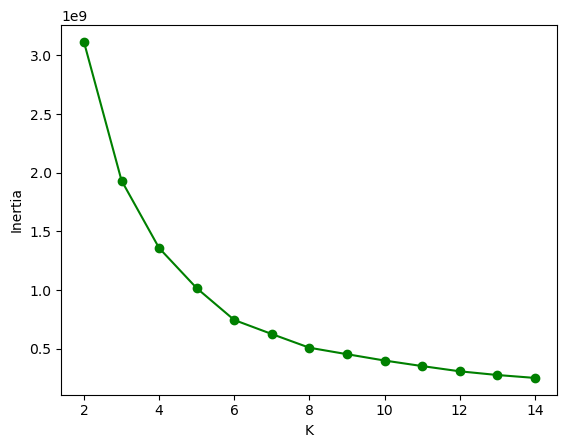

In [76]:
plt.plot(range(2,15), wcss, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia");

In [77]:
km2 =KMeans(n_clusters=4)
km2.fit(Y)

KMeans(n_clusters=4)

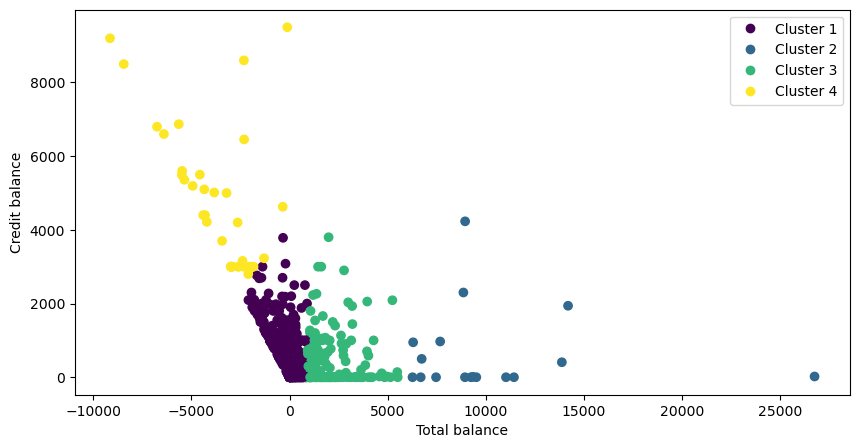

In [78]:
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= Y.iloc[:, 1], y=Y.iloc[:, 0], c= km2.labels_)
plt.xlabel('Total balance')
plt.ylabel('Credit balance');
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']) ## 'Cluster 5']);

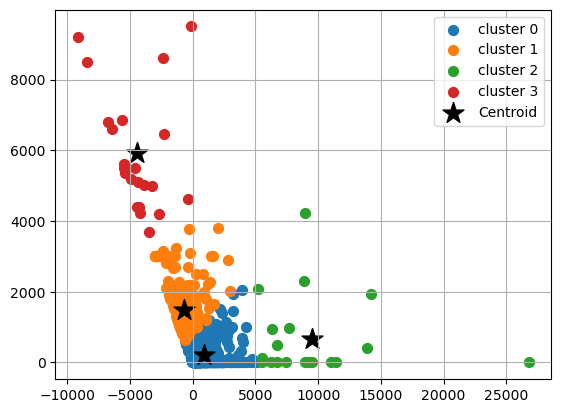

In [79]:
##Visualize with centroids
Y = df_financial_info.iloc[:, [4, 3]].values
scal = StandardScaler()
Y_scal = scal.fit_transform(Y)
km_scal = km2.fit_predict(Y_scal)
draw_clusters(Y, km_scal, centers= True)

### Do they have saving account? How much do they save?

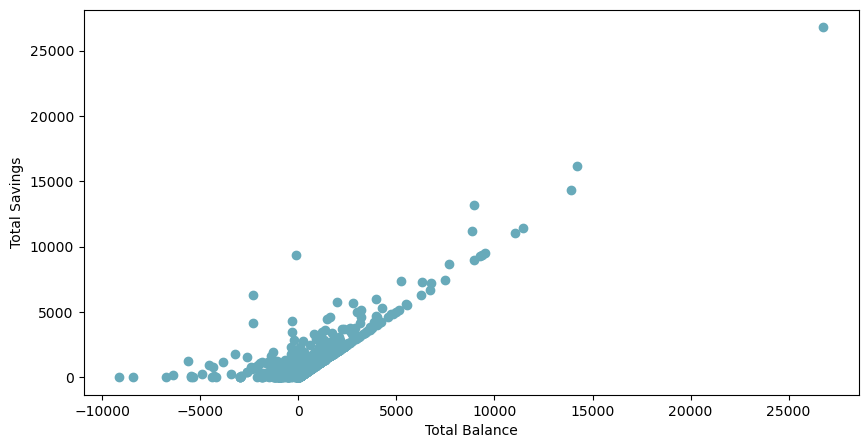

In [80]:
plt.figure(figsize=(10,5))
#plt.scatter(x= df_financial_info['total_saved'], y=df_financial_info['balance_total'],color='#68aaba')
plt.scatter(x= df_financial_info['balance_total'], y=df_financial_info['total_saved'],color='#68aaba')
plt.xlabel('Total Balance')
plt.ylabel('Total Savings');


#fig, ax = plt.subplots(figsize=(8, 6))
#sns.scatterplot(x=df_financial_info['saving_bal'], y=df_financial_info['balance_total'], data=df_financial_info, ax=ax)

#fig.tight_layout()

### Do they have credit account? How much do they live in debt?

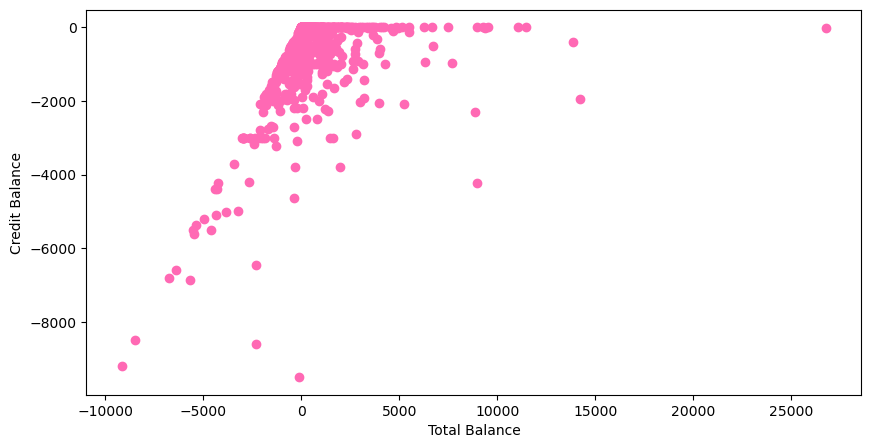

In [81]:
plt.figure(figsize=(10,5))
plt.scatter(x= df_financial_info['balance_total'], y=df_financial_info['credit_balance_neg'],color='hotpink')
plt.xlabel('Total Balance')
plt.ylabel('Credit Balance');

### Are they making lot of small transactions or few huge ones?

In [82]:
df_transactions_all
df_transactions_all['abs_val_transaction'] = df_transactions_all['tran_amt'].abs()
df_transactions_all

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,abs_val_transaction
0,1363481,26,136.03,136.03,0.00,1521.57,1995-10-26,8.0,DP,136.03
1,1362746,1,2.83,0.00,2.83,2265.90,1995-01-31,23.0,IN,2.83
2,1363251,11,13.56,0.00,13.56,5438.90,1995-04-30,23.0,IN,13.56
3,1362542,4,0.76,0.00,0.76,610.92,1995-04-30,23.0,IN,0.76
4,1363387,11,148.69,148.69,0.00,470.05,1995-05-21,14.0,DP,148.69
...,...,...,...,...,...,...,...,...,...,...
46199,1363272,50,-0.15,-0.15,0.00,319.71,1995-10-03,NaN,FK,0.15
46200,1363393,61,-102.52,-102.52,0.00,57.47,1995-01-22,NaN,WD,102.52
46201,1363365,25,-275.89,-275.89,0.00,2632.93,1995-01-08,NaN,WD,275.89
46202,1363031,73,-0.15,-0.15,0.00,1103.47,1995-01-23,NaN,FK,0.15


In [83]:
labels =  ['High', 'Medium','Low','Sporadic']
binned_transactions= pd.cut(df_transactions_all['abs_val_transaction'], bins = 4, labels= labels)#.value_counts()
binned_transactions.value_counts()

High        77531
Medium         26
Low             2
Sporadic        1
Name: abs_val_transaction, dtype: int64

In [84]:
#df_trans_graph = pd.DataFrame(df_transactions_all.groupby(['cust_id','tran_amt']).count()['tran_id'])
#df_transactions_all[['cust_id','tran_amt']].groupby(['cust_id']).count()#(['tran_id'])
#.sum()[''])
binned_transactions

0        High
1        High
2        High
3        High
4        High
         ... 
46199    High
46200    High
46201    High
46202    High
46203    High
Name: abs_val_transaction, Length: 77560, dtype: category
Categories (4, object): ['High' < 'Medium' < 'Low' < 'Sporadic']

(array([7.7531e+04, 2.6000e+01, 2.0000e+00, 1.0000e+00]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

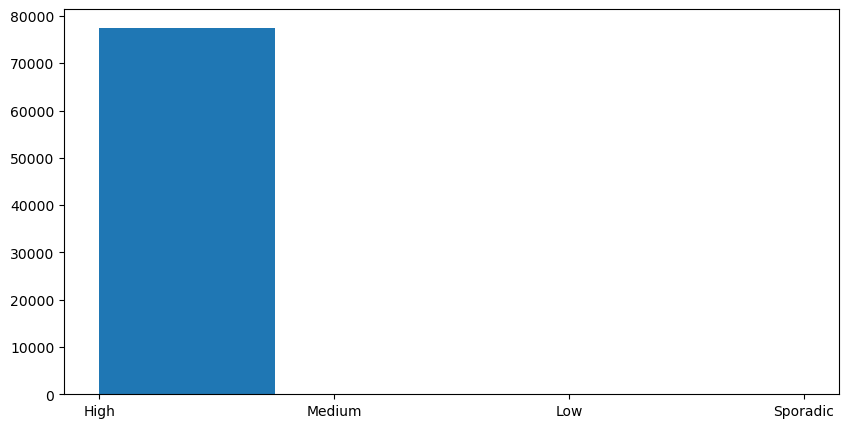

In [85]:
plt.figure(figsize=(10,5))
plt.hist(binned_transactions, bins = 4)
#plt.xlabel('Total Balance')
#plt.ylabel('Credit Balance');

### Visualize the created clusters using radar charts and compare them agains each other

In [86]:
## Add columns from First segmentation
df_income_age
df_financial_info = pd.merge(df_financial_info,df_income_age, how= 'inner', on=['cust_id'])
df_financial_info


,cust_id,saving_bal,checking_bal,credit_bal,balance_total,total_saved,transactions_total,credit_balance_neg,income,age
0,1362480,1187.97,86.86,20.00,1254.83,1274.83,157.0,-20.00,50890,33
1,1362484,2122.17,95.32,369.72,1847.77,2217.49,187.0,-369.72,10053,42
2,1362485,0.00,45.49,1100.00,-1054.51,45.49,171.0,-1100.00,22690,25
3,1362486,116.24,3312.27,0.00,3428.51,3428.51,50.0,-0.00,10701,76
4,1362487,12.89,1401.21,1548.23,-134.13,1414.10,103.0,-1548.23,6605,71
...,...,...,...,...,...,...,...,...,...,...
660,1363490,2301.53,0.00,0.00,2301.53,2301.53,12.0,-0.00,0,15
661,1363491,17.82,0.00,0.00,17.82,17.82,18.0,-0.00,0,14
662,1363492,1116.10,106.14,6869.00,-5646.76,1222.24,153.0,-6869.00,142274,54
663,1363493,553.61,2053.90,0.00,2607.51,2607.51,118.0,-0.00,30068,69


In [87]:
min_max = MinMaxScaler(feature_range=(0,5))
df_minmax= min_max.fit_transform(df_financial_info)
df_minmax

array([[0.        , 0.26478439, 0.03293777, ..., 4.98947368, 1.76508945,
        1.31578947],
       [0.01970443, 0.47300647, 0.03614585, ..., 4.80541053, 0.34868234,
        1.90789474],
       [0.02463054, 0.        , 0.01725005, ..., 4.42105263, 0.78698919,
        0.78947368],
       ...,
       [4.98522167, 0.24876542, 0.04024885, ..., 1.38473684, 4.93468926,
        2.69736842],
       [4.99014778, 0.12339309, 0.77884975, ..., 5.        , 1.04289074,
        3.68421053],
       [5.        , 0.62033328, 0.06768814, ..., 5.        , 0.68116706,
        1.51315789]])

In [88]:
df_info_mnmx = pd.DataFrame(df_minmax,columns=df_financial_info.columns.to_list())
df_info_mnmx

,cust_id,saving_bal,checking_bal,credit_bal,balance_total,total_saved,transactions_total,credit_balance_neg,income,age
0,0.000000,0.264784,0.032938,0.010526,1.448577,0.237907,2.984791,4.989474,1.765089,1.315789
1,0.019704,0.473006,0.036146,0.194589,1.531099,0.413825,3.555133,4.805411,0.348682,1.907895
2,0.024631,0.000000,0.017250,0.578947,1.127175,0.008489,3.250951,4.421053,0.786989,0.789474
3,0.029557,0.025909,1.256030,0.000000,1.751097,0.639824,0.950570,5.000000,0.371158,4.144737
4,0.034483,0.002873,0.531346,0.814858,1.255269,0.263897,1.958175,4.185142,0.229091,3.815789
...,...,...,...,...,...,...,...,...,...,...
660,4.975369,0.512984,0.000000,0.000000,1.594250,0.429508,0.228137,5.000000,0.000000,0.131579
661,4.980296,0.003972,0.000000,0.000000,1.276416,0.003326,0.342205,5.000000,0.000000,0.065789
662,4.985222,0.248765,0.040249,3.615263,0.488051,0.228093,2.908745,1.384737,4.934689,2.697368
663,4.990148,0.123393,0.778850,0.000000,1.636835,0.486610,2.243346,5.000000,1.042891,3.684211


In [89]:
kmeans= KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_financial_info)
k_labels = kmeans.labels_
new_columns = kmeans.predict(df_financial_info)
k_clusters = pd.DataFrame(new_columns)

In [90]:
k_clusters

,0
0,1
1,0
2,3
3,0
4,0
...,...
660,0
661,0
662,2
663,3


In [91]:
df_financial_cluster = pd.concat([df_info_mnmx,k_clusters],axis=1)
df_financial_cluster

,cust_id,saving_bal,checking_bal,credit_bal,balance_total,total_saved,transactions_total,credit_balance_neg,income,age,0
0,0.000000,0.264784,0.032938,0.010526,1.448577,0.237907,2.984791,4.989474,1.765089,1.315789,1
1,0.019704,0.473006,0.036146,0.194589,1.531099,0.413825,3.555133,4.805411,0.348682,1.907895,0
2,0.024631,0.000000,0.017250,0.578947,1.127175,0.008489,3.250951,4.421053,0.786989,0.789474,3
3,0.029557,0.025909,1.256030,0.000000,1.751097,0.639824,0.950570,5.000000,0.371158,4.144737,0
4,0.034483,0.002873,0.531346,0.814858,1.255269,0.263897,1.958175,4.185142,0.229091,3.815789,0
...,...,...,...,...,...,...,...,...,...,...,...
660,4.975369,0.512984,0.000000,0.000000,1.594250,0.429508,0.228137,5.000000,0.000000,0.131579,0
661,4.980296,0.003972,0.000000,0.000000,1.276416,0.003326,0.342205,5.000000,0.000000,0.065789,0
662,4.985222,0.248765,0.040249,3.615263,0.488051,0.228093,2.908745,1.384737,4.934689,2.697368,2
663,4.990148,0.123393,0.778850,0.000000,1.636835,0.486610,2.243346,5.000000,1.042891,3.684211,3


In [92]:
df_financial_cluster = df_financial_cluster.rename(columns= { 0 : "cluster"} )
df_financial_cluster

,cust_id,saving_bal,checking_bal,credit_bal,balance_total,total_saved,transactions_total,credit_balance_neg,income,age,cluster
0,0.000000,0.264784,0.032938,0.010526,1.448577,0.237907,2.984791,4.989474,1.765089,1.315789,1
1,0.019704,0.473006,0.036146,0.194589,1.531099,0.413825,3.555133,4.805411,0.348682,1.907895,0
2,0.024631,0.000000,0.017250,0.578947,1.127175,0.008489,3.250951,4.421053,0.786989,0.789474,3
3,0.029557,0.025909,1.256030,0.000000,1.751097,0.639824,0.950570,5.000000,0.371158,4.144737,0
4,0.034483,0.002873,0.531346,0.814858,1.255269,0.263897,1.958175,4.185142,0.229091,3.815789,0
...,...,...,...,...,...,...,...,...,...,...,...
660,4.975369,0.512984,0.000000,0.000000,1.594250,0.429508,0.228137,5.000000,0.000000,0.131579,0
661,4.980296,0.003972,0.000000,0.000000,1.276416,0.003326,0.342205,5.000000,0.000000,0.065789,0
662,4.985222,0.248765,0.040249,3.615263,0.488051,0.228093,2.908745,1.384737,4.934689,2.697368,2
663,4.990148,0.123393,0.778850,0.000000,1.636835,0.486610,2.243346,5.000000,1.042891,3.684211,3


In [93]:
df_financial_cluster = df_financial_cluster.drop(columns=['cust_id'])
df_data_graph = df_financial_cluster.groupby('cluster').mean().divide(df_financial_cluster.drop('cluster',axis=1).mean())
df_data_graph

,saving_bal,checking_bal,credit_bal,balance_total,total_saved,transactions_total,credit_balance_neg,income,age
cluster,,,,,,,,,
0,0.746921,0.622813,0.645864,0.989626,0.698278,0.948419,1.034076,0.261528,0.860158
1,1.385293,1.491302,1.847968,0.984630,1.426842,1.051862,0.918407,2.021810,1.128300
2,3.620179,3.095213,1.733728,1.264879,3.414425,1.049348,0.929399,3.920444,1.247060
3,0.753091,0.935791,0.898708,0.984926,0.824698,1.033522,1.009747,1.008789,1.081661


In [94]:
categories = df_data_graph.columns.to_list()
fig = go.Figure()

i=0
for index, series in df_data_graph.iterrows():
    r = []
    r.append(series.values)
    
    fig.add_trace(go.Scatterpolar(
        r=r[0],
        theta=categories,
        fill='toself',
        name=f'Cluster {i}'))
    i+=1

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 4]
    )),
  showlegend=True)
  
fig.show()